# Objective: Analysis of Movie Profitability across Release Months

To determine profitability across release seasons, aiming to guide our company’s strategy in Releasing films during the seasons which more likely to generate more profits.

### 1. Loading and exploring the Data (tn.movie_budgets.csv)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from datetime import datetime



In [63]:
# Read the csv file into a Dataframe
movie_budgets_df = pd.read_csv('../../DataSets/tn.movie_budgets.csv')


movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [64]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [65]:
# Extract month  from release_date for seasonality analysis
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'], format="%b %d, %Y", errors='coerce')
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.month

In [66]:
# Generate the unique available months
movie_budgets_df['release_month'].unique()

array([12,  5,  6,  4, 11,  7,  3,  2, 10,  8,  9,  1], dtype=int64)

In [67]:
# Data Type Concersion finacial columns from object to float
financial_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in financial_columns:
    movie_budgets_df[col] = movie_budgets_df[col].replace('[\$,]', '', regex=True).astype(float)

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB


# Calculating Profitability of the movies

Profit = (Total_gross - production budget)

In [68]:


# Calculate Total gross
movie_budgets_df['total_gross'] = movie_budgets_df['worldwide_gross'] + movie_budgets_df['domestic_gross']

# Calculate profit
movie_budgets_df['cost_ratio'] = (movie_budgets_df['total_gross'] / movie_budgets_df['production_budget'])
movie_budgets_df['profit'] = (movie_budgets_df['total_gross'] - movie_budgets_df['production_budget'])


movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,cost_ratio,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,3.536853e+09,8.322007,3.111853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,1.286728e+09,3.133774,8.761278e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,1.925247e+08,0.550071,-1.574753e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,1.862020e+09,5.632244,1.531420e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,1.936903e+09,6.110105,1.619903e+09


In [69]:
# Calculate average profit and total_gross profitability by month
monthly_seasonality = movie_budgets_df.groupby('release_month').agg(
    avg_total_gross=('total_gross', 'mean'),
    avg_profit=('profit', 'mean')
).sort_values(by='avg_profit', ascending=False).reset_index()

print("Monthly Seasonality:\n", monthly_seasonality)


Monthly Seasonality:
     release_month  avg_total_gross    avg_profit
0               5     2.289660e+08  1.818308e+08
1               6     2.083509e+08  1.652518e+08
2               7     2.016917e+08  1.591455e+08
3              11     1.939228e+08  1.513227e+08
4              12     1.477940e+08  1.145424e+08
5               3     1.192064e+08  8.842428e+07
6               2     1.069592e+08  7.891276e+07
7               8     9.314662e+07  6.759052e+07
8               4     8.724866e+07  6.344583e+07
9              10     7.388806e+07  5.349540e+07
10              1     7.051344e+07  4.966995e+07
11              9     6.984357e+07  4.803067e+07


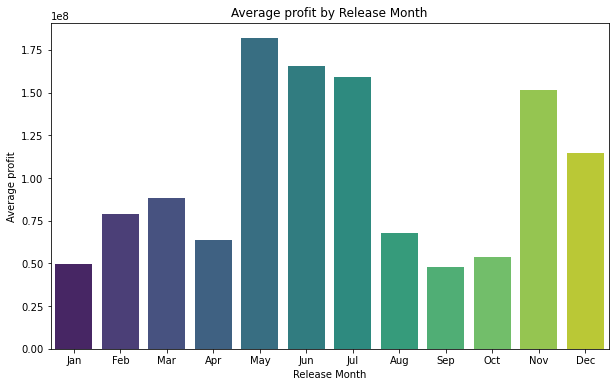

In [70]:
# Plotting profit across months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_seasonality['release_month'], y=monthly_seasonality['avg_profit'], palette='viridis')

# Labeling the plot
plt.title("Average profit by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average profit")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.show()


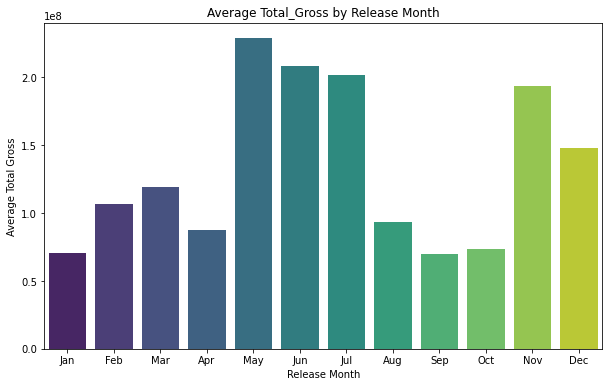

In [71]:
# Plotting Cost ratio across months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_seasonality['release_month'], y=monthly_seasonality['avg_total_gross'], palette='viridis')

# Labeling the plot
plt.title("Average Total_Gross by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Total Gross")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.show()

In [80]:
#Correlation Analysis between average profit and average total_gross

correlation, p_value = pearsonr(monthly_seasonality['avg_total_gross'], monthly_seasonality['avg_profit'])

print(f"Correlation between average Revenue and Average Profit: {correlation} (p-value: {p_value})")

Correlation between average Revenue and Average Profit: 0.9998499405185896 (p-value: 5.990445879349743e-19)


## Observation
The correlation of 0.9998 between average profit and average total gross with a p-value of 5.99e-19 indicates an almost perfect positive linear relationship. Here’s what that means:

Extremely High Positive Correlation (0.9998):

This correlation, being very close to +1, suggests that profit and total gross move in near-perfect alignment. Essentially, as the total gross increases, profit also increases almost proportionally. This high correlation is expected because profit is derived directly from the total gross (i.e., total gross minus production budget).

In [77]:
#Linear regression model between profit and total_gross
X = monthly_seasonality['avg_total_gross']
Y = monthly_seasonality['avg_profit']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print regression model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             avg_profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.331e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           5.99e-19
Time:                        14:24:58   Log-Likelihood:                -180.59
No. Observations:                  12   AIC:                             365.2
Df Residuals:                      10   BIC:                             366.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.821e+06   6.66e+05    -

c:\Users\Ronnie\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


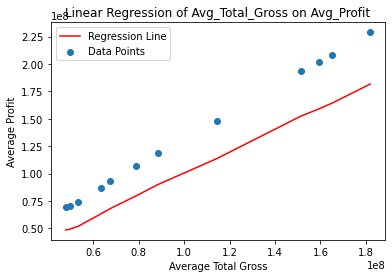

In [78]:
# Plot the regression results
plt.scatter(monthly_seasonality['avg_profit'], monthly_seasonality['avg_total_gross'], label='Data Points')
plt.plot(monthly_seasonality['avg_profit'], predictions, color='red', label='Regression Line')
plt.xlabel('Average Total Gross')
plt.ylabel('Average Profit')
plt.title('Linear Regression of Avg_Total_Gross on Avg_Profit')
plt.legend()
plt.show()